<a href="https://colab.research.google.com/github/gunelatakishyeva/MachineLearningProjects/blob/main/World_Air_Quality_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/AQI and Lat Long of Countries.csv')
df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,United States of America,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate,37.5516,-77.3285
16691,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,49.0650,18.9219
16692,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,36.3385,-88.8513
16693,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,48.7786,2.2906


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16695 entries, 0 to 16694
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16393 non-null  object 
 1   City                16695 non-null  object 
 2   AQI Value           16695 non-null  int64  
 3   AQI Category        16695 non-null  object 
 4   CO AQI Value        16695 non-null  int64  
 5   CO AQI Category     16695 non-null  object 
 6   Ozone AQI Value     16695 non-null  int64  
 7   Ozone AQI Category  16695 non-null  object 
 8   NO2 AQI Value       16695 non-null  int64  
 9   NO2 AQI Category    16695 non-null  object 
 10  PM2.5 AQI Value     16695 non-null  int64  
 11  PM2.5 AQI Category  16695 non-null  object 
 12  lat                 16695 non-null  float64
 13  lng                 16695 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 1.8+ MB


In [ ]:
df.isna().sum()

Country               302
City                    0
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
lat                     0
lng                     0
dtype: int64

In [ ]:
df['AQI Category'].value_counts()

AQI Category
Good                              7708
Moderate                          7054
Unhealthy                          871
Unhealthy for Sensitive Groups     869
Very Unhealthy                     131
Hazardous                           62
Name: count, dtype: int64

In [ ]:
df['PM2.5 AQI Category'].value_counts()

PM2.5 AQI Category
Good                              7936
Moderate                          6882
Unhealthy for Sensitive Groups     881
Unhealthy                          828
Very Unhealthy                     115
Hazardous                           53
Name: count, dtype: int64

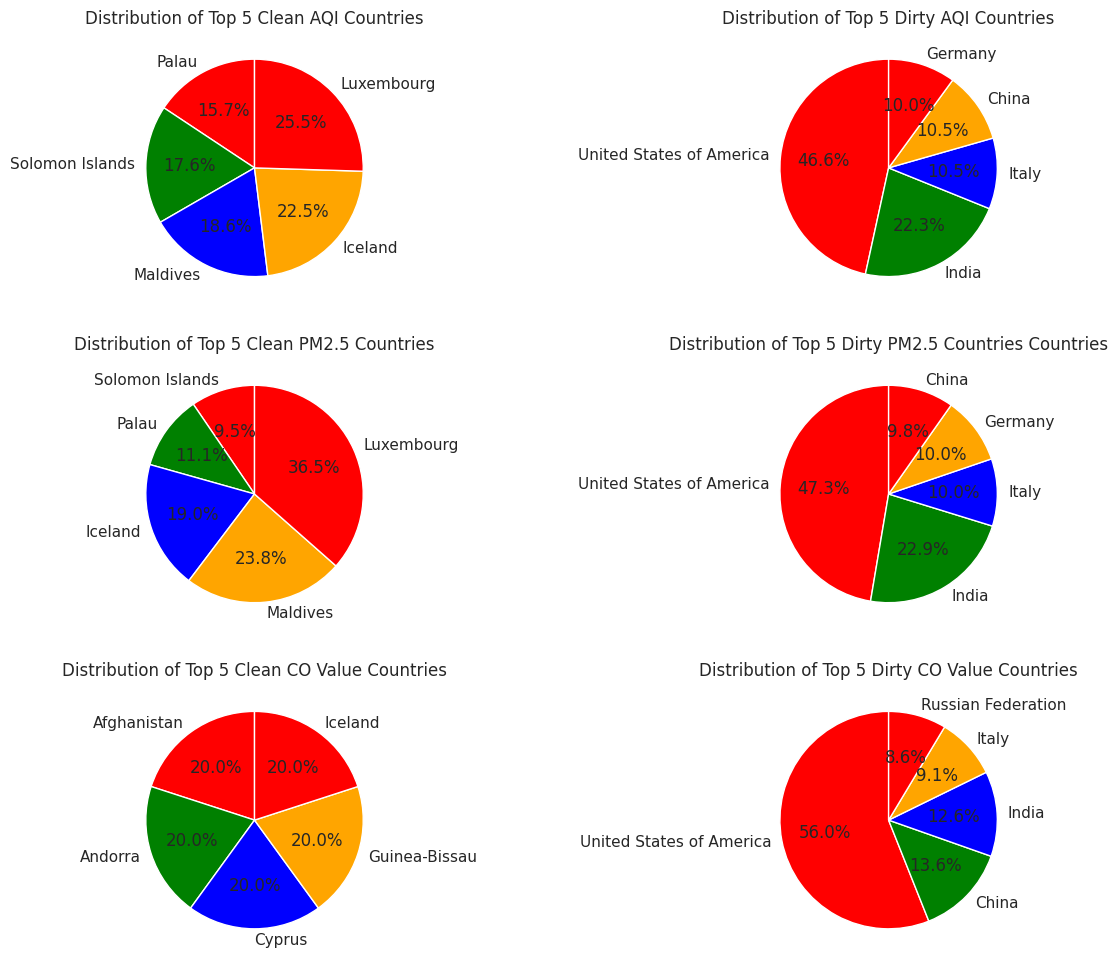

In [ ]:
top_AQI_sum_clean_countries_df = df.groupby('Country',as_index=False).agg({'AQI Value':'sum'}).nsmallest(5,"AQI Value")
top_AQI_sum_dirtiest_countries_df = df.groupby('Country',as_index=False).agg({'AQI Value':'sum'}).nlargest(5,"AQI Value")

top_PM25_sum_clean_countries_df = df.groupby('Country',as_index=False).agg({'PM2.5 AQI Value':'sum'}).nsmallest(5,"PM2.5 AQI Value")
top_PM25_sum_dirtiest_countries_df = df.groupby('Country',as_index=False).agg({'PM2.5 AQI Value':'sum'}).nlargest(5,"PM2.5 AQI Value")
top_CO_sum_clean_countries_df = df[df['CO AQI Value']!=0].groupby('Country',as_index=False).agg({'CO AQI Value':'sum'}).nsmallest(5,"CO AQI Value")
top_CO_sum_dirtiest_countries_df = df.groupby('Country',as_index=False).agg({'CO AQI Value':'sum'}).nlargest(5,"CO AQI Value")

fig, ((p1,p2), (p3,p4), (p5,p6)) = plt.subplots(3, 2, figsize=(15, 12))


p1.pie(top_AQI_sum_clean_countries_df['AQI Value'], labels=top_AQI_sum_clean_countries_df['Country'], autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'orange'])
p1.set_title('Distribution of Top 5 Clean AQI Countries')

p2.pie(top_AQI_sum_dirtiest_countries_df['AQI Value'], labels=top_AQI_sum_dirtiest_countries_df['Country'], autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'orange'])
p2.set_title('Distribution of Top 5 Dirty AQI Countries')

p3.pie(top_PM25_sum_clean_countries_df['PM2.5 AQI Value'], labels=top_PM25_sum_clean_countries_df['Country'], autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'orange'])
p3.set_title('Distribution of Top 5 Clean PM2.5 Countries')

p4.pie(top_PM25_sum_dirtiest_countries_df['PM2.5 AQI Value'], labels=top_PM25_sum_dirtiest_countries_df['Country'], autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'orange'])
p4.set_title('Distribution of Top 5 Dirty PM2.5 Countries Countries')

p5.pie(top_CO_sum_clean_countries_df['CO AQI Value'], labels=top_CO_sum_clean_countries_df['Country'], autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'orange'])
p5.set_title('Distribution of Top 5 Clean CO Value Countries')

p6.pie(top_CO_sum_dirtiest_countries_df['CO AQI Value'], labels=top_CO_sum_dirtiest_countries_df['Country'], autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'orange'])
p6.set_title('Distribution of Top 5 Dirty CO Value Countries')

plt.show()

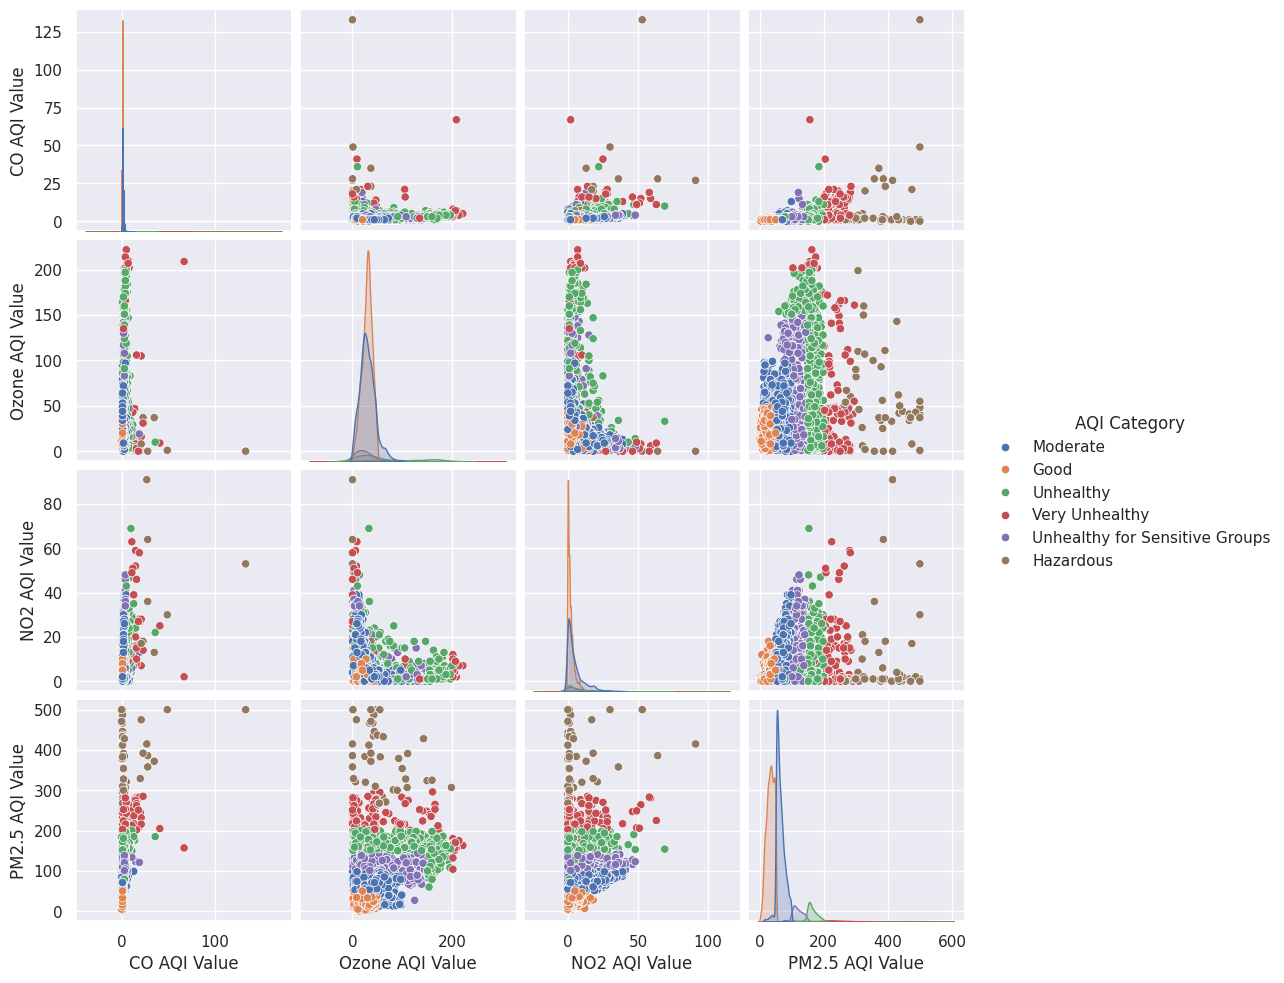

In [ ]:
import seaborn as sns
sns.pairplot(data=df,hue='AQI Category', vars=['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value'],)

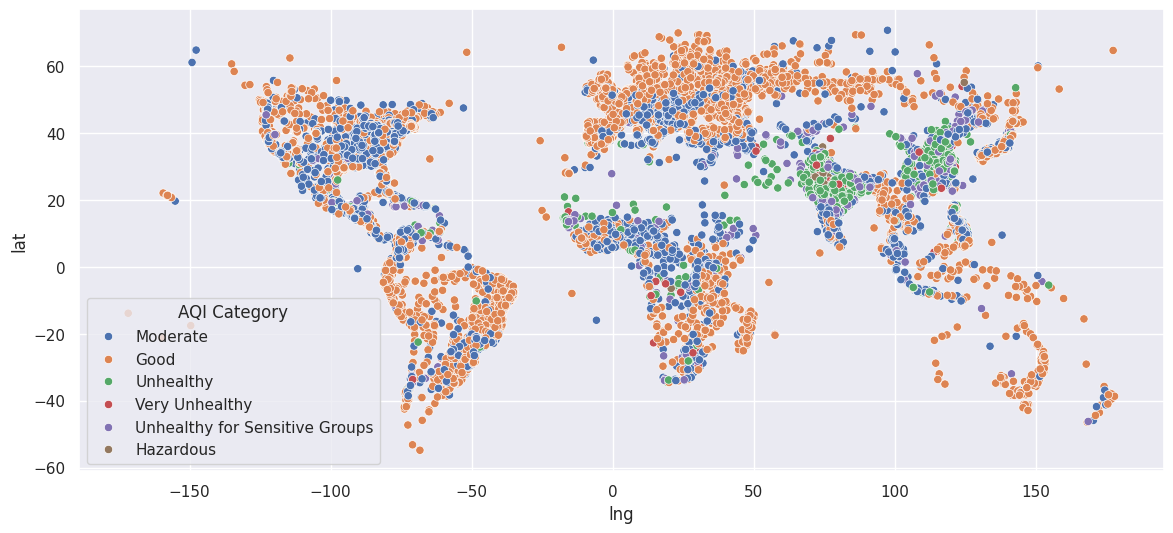

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x='lng', y='lat', hue='AQI Category')
sns.set(style="darkgrid")
plt.show()

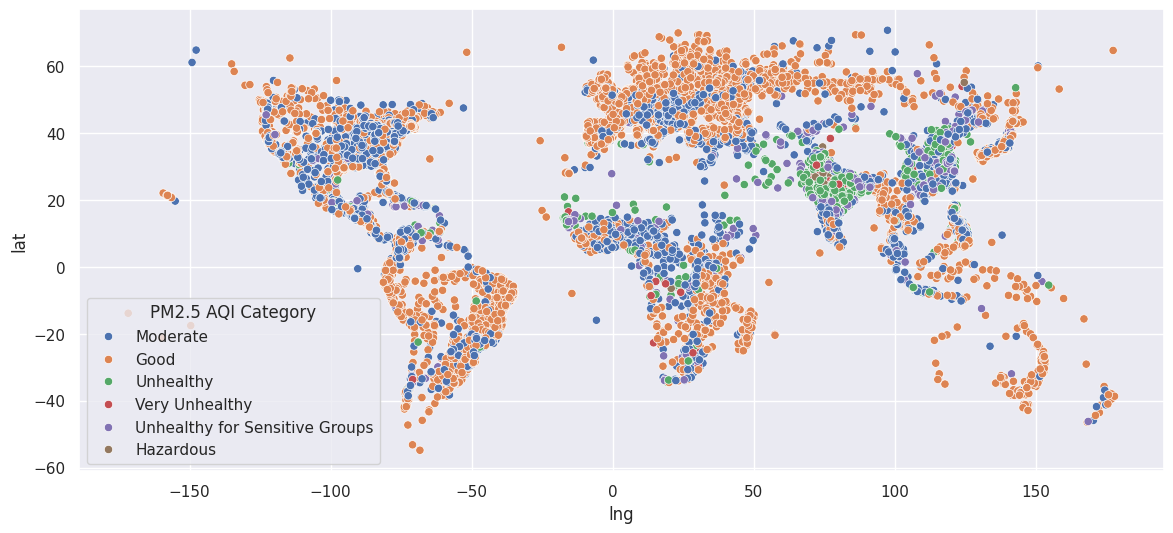

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x='lng', y='lat', hue='PM2.5 AQI Category')
sns.set(style="darkgrid")
plt.show()

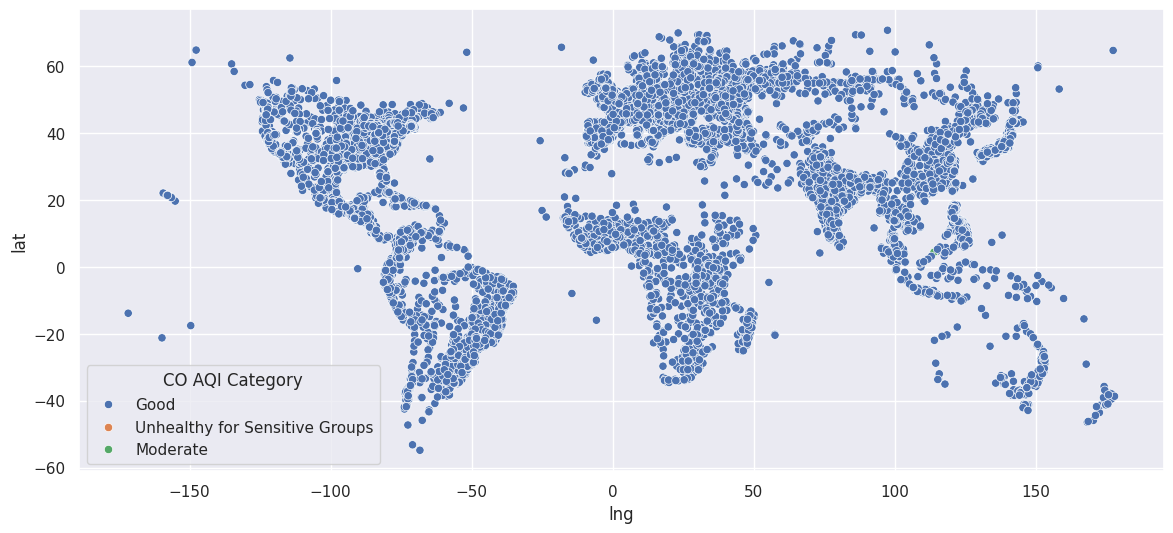

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x='lng', y='lat', hue='CO AQI Category')
sns.set(style="darkgrid")
plt.show()

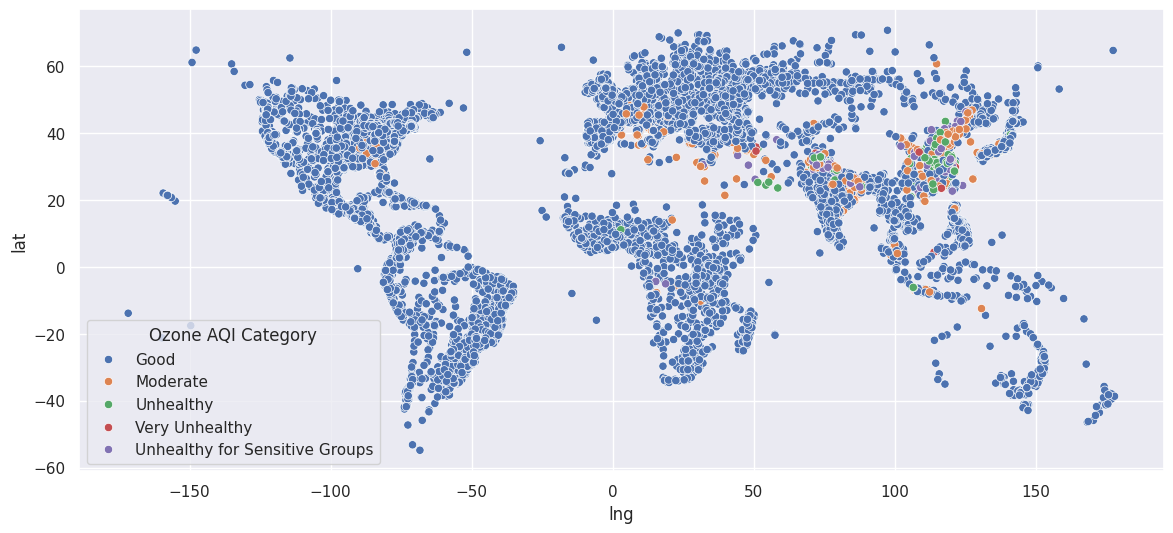

In [ ]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x='lng', y='lat', hue='Ozone AQI Category')
sns.set(style="darkgrid")
plt.show()

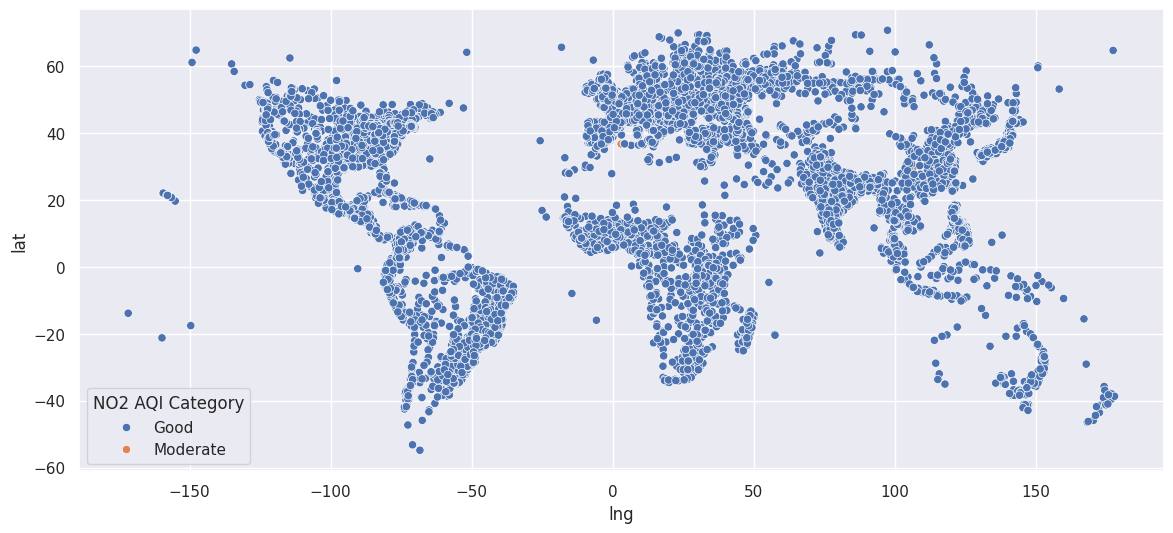

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='lng', y='lat', hue='NO2 AQI Category')
sns.set(style="darkgrid")
plt.show()

In [ ]:
X=df.drop('AQI Category',axis=1)
y=df['AQI Category'].copy()

In [ ]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [ ]:
num_features=X_train.select_dtypes(include=[np.number]).columns
cat_features=X_train.select_dtypes(exclude=[np.number]).columns

In [ ]:
num_features

Index(['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value',
       'PM2.5 AQI Value', 'lat', 'lng'],
      dtype='object')

In [ ]:
cat_features

Index(['Country', 'City', 'CO AQI Category', 'Ozone AQI Category',
       'NO2 AQI Category', 'PM2.5 AQI Category'],
      dtype='object')

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
num_pipeline=make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)

cat_pipeline=make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

transformer=ColumnTransformer([
    ('num_pipeline',num_pipeline,num_features),
    ('cat_pipeline',cat_pipeline,cat_features)
])

In [ ]:
X_transformed_train=transformer.fit_transform(X_train)
X_transformed_test=transformer.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
rnd_clf=RandomForestClassifier()
rnd_clf.fit(X_transformed_train,y_train)

RandomForestClassifier()

In [ ]:
rnd_clf.score(X_transformed_test,y_test)

1.0

In [ ]:
rnd_clf.score(X_transformed_train,y_train)

1.0

In [ ]:
svm_clf=SVC()
svm_clf.fit(X_transformed_train,y_train)

SVC()

SVC()

In [ ]:
svm_clf.score(X_transformed_test,y_test)

0.9988020365378856

In [ ]:
svm_clf.score(X_transformed_train,y_train)

0.9999001697114904

In [ ]:
log_reg=LogisticRegression(max_iter=10_000)
log_reg.fit(X_transformed_train,y_train)

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_transformed_test,y_test)

1.0

In [ ]:
log_reg.score(X_transformed_train,y_train)

1.0

In [ ]:
voting_clf=VotingClassifier(
    estimators=[
        ('rnd_clf',RandomForestClassifier(random_state=42)),
        ('svm_clf',SVC(random_state=42)),
        ('log_reg',LogisticRegression(random_state=42,max_iter=10_000))
    ])

voting_clf.fit(X_transformed_train,y_train)


VotingClassifier(estimators=[('rnd_clf',
                              RandomForestClassifier(random_state=42)),
                             ('svm_clf', SVC(random_state=42)),
                             ('log_reg',
                              LogisticRegression(max_iter=10000,
                                                 random_state=42))])

In [ ]:
voting_clf.score(X_transformed_test,y_test)

1.0

In [ ]:
voting_clf.score(X_transformed_train,y_train)

1.0